In [20]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 6.1.12

In [8]:
# Этап 1: Исходные данные
x = np.array([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25,1.5 ,1.75, 2])
y = np.array([0.192, -0.054,-0.209,-0.429,-0.413,-0.491,-0.357,-0.343, -0.140, -0.130, 0.142, 0.288, 0.876])

In [15]:

# Этап 2: Функция для вычисления многочленов и sigma
def mnk(x, y):
    max_m = len(x) - 1  # максимальная степень многочлена
    sigmas = []
    polynomials = []

    for m in range(max_m + 1):
        coeffs = np.polyfit(x, y, m)
        p = np.poly1d(coeffs)
        polynomials.append(p)

        y_pred = p(x)
        if len(x) - m - 1 > 0:
            sigma = np.sqrt(np.sum((y_pred - y) ** 2) / (len(x) - m))
        else:
            sigma = np.inf
        sigmas.append(sigma)

    return sigmas, polynomials

sigmas, polynomials = mnk(x, y)

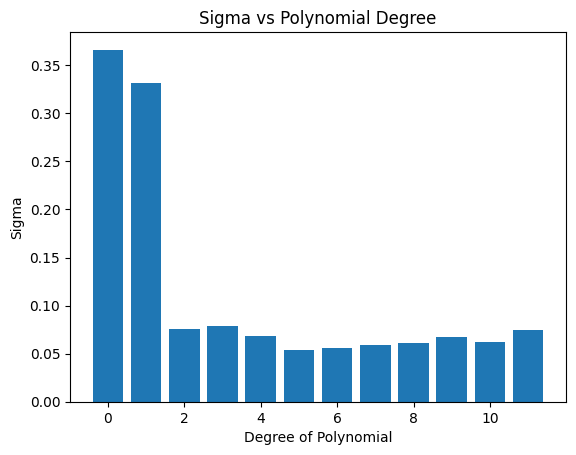

In [16]:
# Этап 3: Гистограмма sigma
plt.figure()
plt.bar(range(len(sigmas)), sigmas)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Sigma')
plt.title('Sigma vs Polynomial Degree')
plt.show()

# Выбор оптимальной степени многочлена
optimal_m = np.argmin(sigmas[:-1])  # Исключая последний элемент (inf)

Text(0.5, 1.0, 'Polynomial Fits up to Optimal Degree')

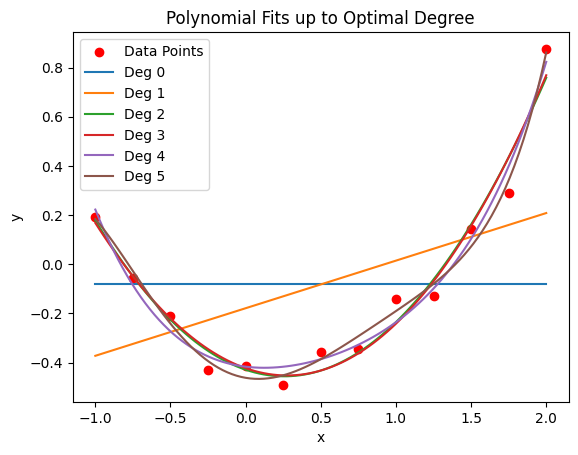

In [17]:

# Этап 4: Графики многочленов и исходной функции
plt.figure()
# Точечный график исходных данных
plt.scatter(x, y, color='red', label='Data Points')

x_vals = np.linspace(np.min(x), np.max(x), 100)
for m in range(optimal_m + 1):
    y_vals = polynomials[m](x_vals)
    plt.plot(x_vals, y_vals, label=f'Deg {m}')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fits up to Optimal Degree')


# 6.3.5

Параметр a: 10.701041821804584
Параметр b: -3.2402026775598247
Sigma для линейной модели: 0.00010475178209675388


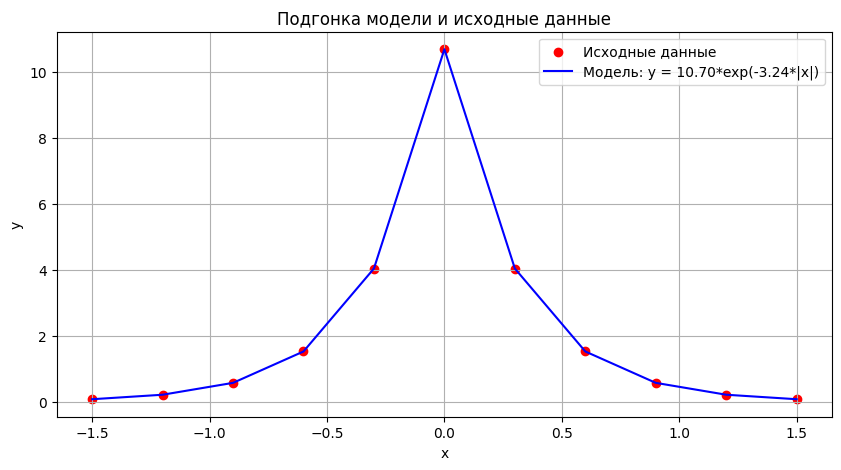

In [22]:
# Исходные данные
x_data = np.array([-1.5, -1.2, -0.9, -0.6, -0.3, 0, 0.3, 0.6, 0.9, 1.2, 1.5])
y_data = np.array([0.0829, 0.2192, 0.5794, 1.5315, 4.0481, 10.7, 4.0481, 1.5315, 0.5794, 0.2192, 0.0829])

# Преобразование
y_transformed = np.log(y_data)
x_transformed = np.abs(x_data)

# Получение результатов с mnk
sigmas, polynomials = mnk(x_transformed, y_transformed)

# Используем первую степень (линейную регрессию)
p = polynomials[1]
a_prime = p.coefficients[1]  # Intercept
b = p.coefficients[0]        # Slope
a = np.exp(a_prime)

# Выводим результаты
print(f"Параметр a: {a}")
print(f"Параметр b: {b}")
print(f"Sigma для линейной модели: {sigmas[1]}")

# Визуализация данных и модели
plt.figure(figsize=(10, 5))
plt.scatter(x_data, y_data, color='red', label='Исходные данные')
plt.plot(x_data, a * np.exp(b * np.abs(x_data)), label=f'Модель: y = {a:.2f}*exp({b:.2f}*|x|)', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Подгонка модели и исходные данные')
plt.grid(True)
plt.show()


# 6.7.6

### Шаг 1: Вычисление значений функции

In [40]:
# Диапазон значений и точки для интерполяции
a, b = 0, np.pi
k = 5  # Примерное количество точек интерполяции, можно изменить
x_points = np.linspace(a, b, k)
y_points = np.abs(np.cos(x_points))


### Шаг 2: Кусочно-линейная интерполяция

In [41]:
def piecewise_linear(x, x_points, y_points):
    for i in range(len(x_points) - 1):
        if x_points[i] <= x <= x_points[i + 1]:
            # Линейное уравнение через две точки
            return np.interp(x, x_points[i:i+2], y_points[i:i+2])


### Шаг 3: Глобальная интерполяция с многочленом Ньютона


In [42]:
def divided_difference(x_points, y_points):
    n = len(y_points)
    f = np.copy(y_points)
    for i in range(1, n):
        for j in range(n-1, i-1, -1):
            f[j] = (f[j] - f[j-1]) / (x_points[j] - x_points[j-i])
    return f  # Разделенные разности

def newton_poly(x, x_points, f):
    n = len(x_points) - 1
    p = f[n]
    for k in range(1, n+1):
        p = f[n-k] + (x - x_points[n-k])*p
    return p

# Вычисляем разделенные разности для данных точек
f_diff = divided_difference(x_points, y_points)


In [43]:
### Шаги 2 и 3: Тестирование интерполяций


In [44]:
test_x = np.linspace(a, b, 3*k)  # 3k тестовых точек в том же интервале
piecewise_vals = [piecewise_linear(x, x_points, y_points) for x in test_x]
newton_vals = [newton_poly(x, x_points, f_diff) for x in test_x]


### Шаги 4: Построение графиков


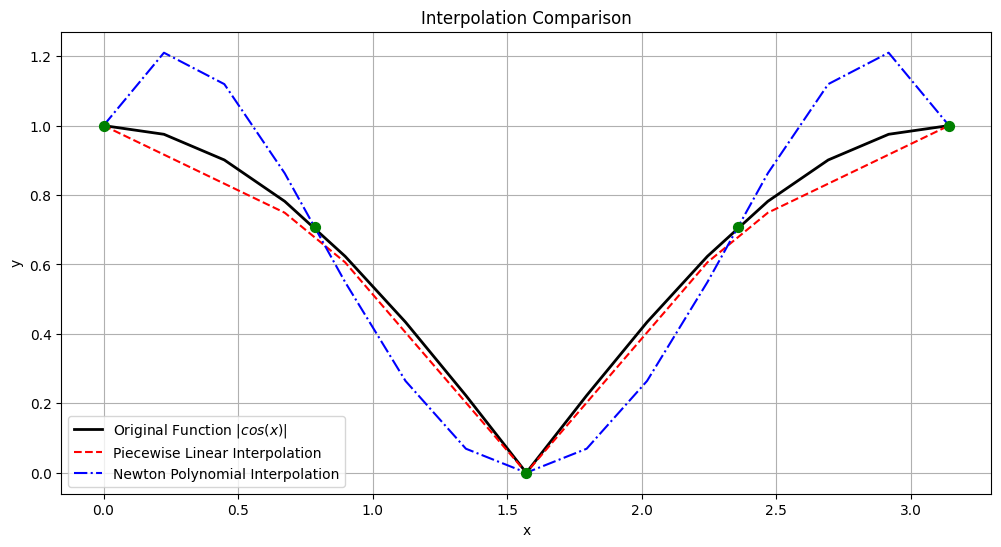

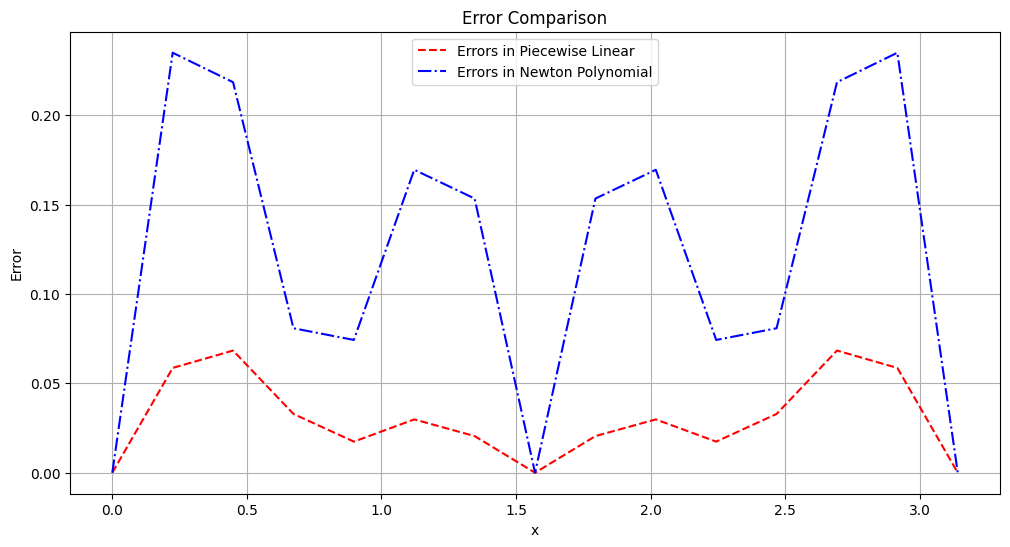

In [45]:

plt.figure(figsize=(12, 6))

# График исходной функции
plt.plot(test_x, np.abs(np.cos(test_x)), label='Original Function $|cos(x)|$', color='black', linewidth=2)

# Кусочно-линейная интерполяция
plt.plot(test_x, piecewise_vals, label='Piecewise Linear Interpolation', linestyle='--', color='red')

# Глобальная интерполяция - многочлен Ньютона
plt.plot(test_x, newton_vals, label='Newton Polynomial Interpolation', linestyle='-.', color='blue')

# Точки интерполяции
plt.scatter(x_points, y_points, color='green', s=50, zorder=5)

plt.title('Interpolation Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Оценка погрешностей
errors_linear = np.abs(np.abs(np.cos(test_x)) - piecewise_vals)
errors_newton = np.abs(np.abs(np.cos(test_x)) - newton_vals)

plt.figure(figsize=(12, 6))
plt.plot(test_x, errors_linear, label='Errors in Piecewise Linear', linestyle='--', color='red')
plt.plot(test_x, errors_newton, label='Errors in Newton Polynomial', linestyle='-.', color='blue')
plt.title('Error Comparison')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


# 6.8.6

In [ ]:
### Шаг 1: Программа-функция построения интерполяционного многочлена


In [46]:
def lagrange_polynomial(x, x_points, y_points):
    def l(i, xp):
        terms = [(xp - x_points[j]) / (x_points[i] - x_points[j]) for j in range(len(x_points)) if i != j]
        return np.prod(terms, axis=0)
    
    polynomial = sum(y_points[i] * l(i, x) for i in range(len(x_points)))
    return polynomial


In [46]:
### Шаг 2: Равномерное распределение узлов


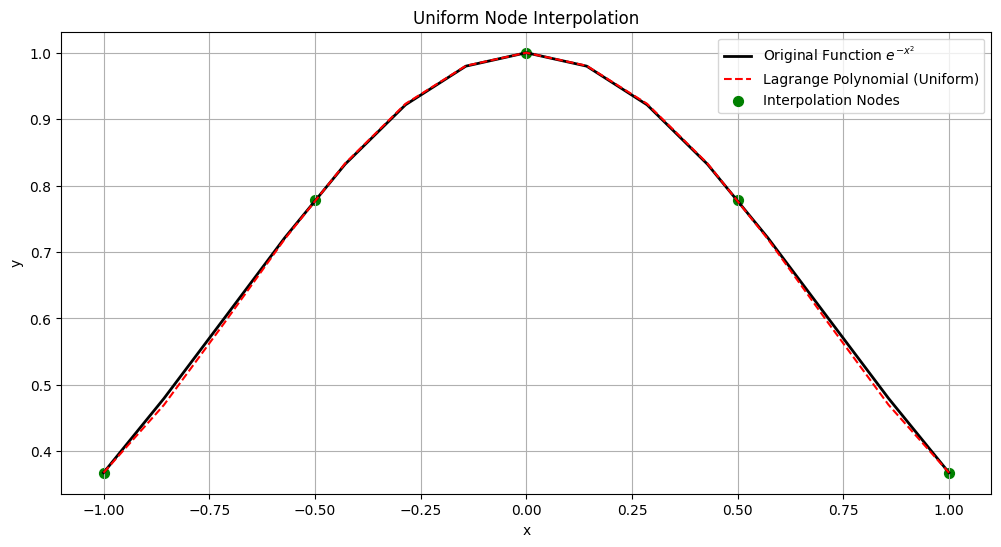

In [47]:
k = 5
x_uniform = np.linspace(-1, 1, k)
y_uniform = np.exp(-x_uniform**2)

# Возьмем 3k точек для оценки многочлена
x_eval = np.linspace(-1, 1, 3 * k)
y_eval_uniform = lagrange_polynomial(x_eval, x_uniform, y_uniform)

plt.figure(figsize=(12, 6))
plt.plot(x_eval, np.exp(-x_eval**2), label='Original Function $e^{-x^2}$', color='black', linewidth=2)
plt.plot(x_eval, y_eval_uniform, label='Lagrange Polynomial (Uniform)', linestyle='--', color='red')
plt.scatter(x_uniform, y_uniform, color='green', label='Interpolation Nodes', s=50)
plt.title('Uniform Node Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [47]:

### Шаг 3: Чебышевское распределение узлов


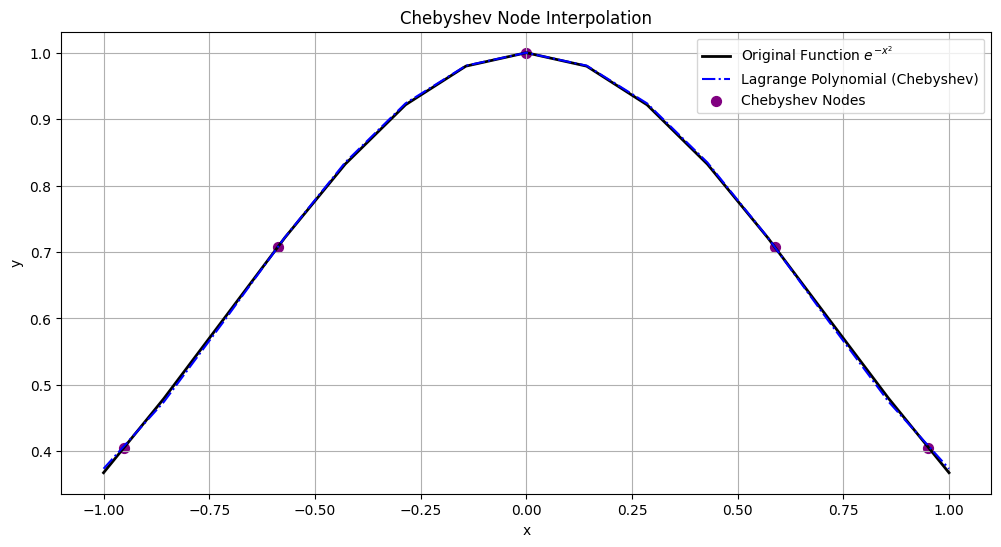

In [48]:
x_chebyshev = np.cos((2 * np.arange(1, k + 1) - 1) / (2 * k) * np.pi)
x_chebyshev = np.sort(x_chebyshev)  # От -1 до 1
y_chebyshev = np.exp(-x_chebyshev**2)

y_eval_chebyshev = lagrange_polynomial(x_eval, x_chebyshev, y_chebyshev)

plt.figure(figsize=(12, 6))
plt.plot(x_eval, np.exp(-x_eval**2), label='Original Function $e^{-x^2}$', color='black', linewidth=2)
plt.plot(x_eval, y_eval_chebyshev, label='Lagrange Polynomial (Chebyshev)', linestyle='-.', color='blue')
plt.scatter(x_chebyshev, y_chebyshev, color='purple', label='Chebyshev Nodes', s=50)
plt.title('Chebyshev Node Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
### Шаг 4: сравнение результатовв при разном числе узлров

In [51]:
error_uniform = np.sqrt(np.mean((np.exp(-x_eval**2) - y_eval_uniform)**2))
error_chebyshev = np.sqrt(np.mean((np.exp(-x_eval**2) - y_eval_chebyshev)**2))

print(f"Error (Uniform nodes, k={k}): {error_uniform}")
print(f"Error (Chebyshev nodes, k={k}): {error_chebyshev}")


Error (Uniform nodes, k=5): 0.004509877199389662
Error (Chebyshev nodes, k=5): 0.0033841954555757663



### Шаг 5: Интерполяции по \(2k\) узлам


In [53]:
k_2 = 2 * k

# Равномерное распределение узлов
x_uniform_2k = np.linspace(-1, 1, k_2)
y_uniform_2k = np.exp(-x_uniform_2k**2)
y_eval_uniform_2k = lagrange_polynomial(x_eval, x_uniform_2k, y_uniform_2k)

# Чебышевское распределение узлов
x_chebyshev_2k = np.cos((2 * np.arange(1, k_2 + 1) - 1) / (2 * k_2) * np.pi)
x_chebyshev_2k = np.sort(x_chebyshev_2k)
y_chebyshev_2k = np.exp(-x_chebyshev_2k**2)
y_eval_chebyshev_2k = lagrange_polynomial(x_eval, x_chebyshev_2k, y_chebyshev_2k)


In [58]:
### Визуализация результатов и сравнение качества приближения

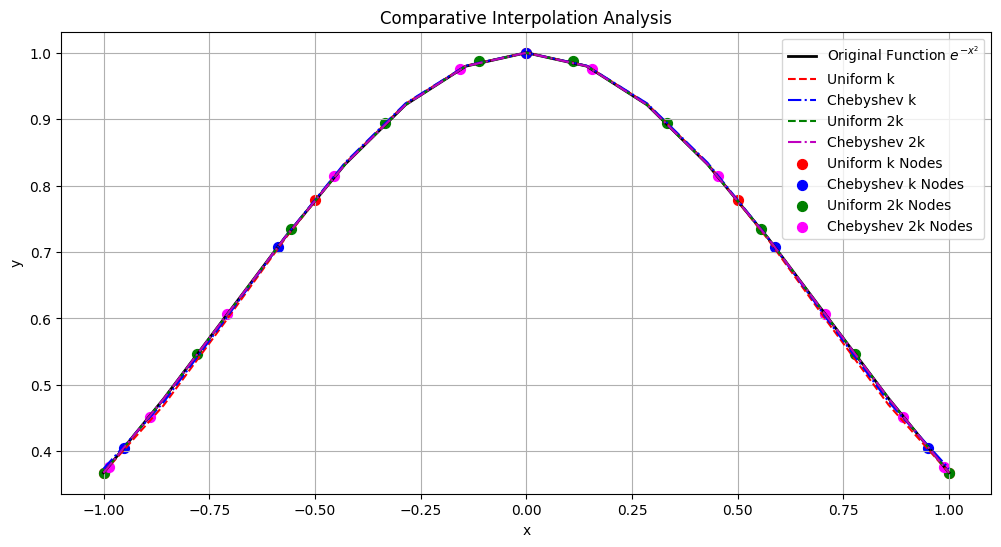

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(x_eval, np.exp(-x_eval**2), label='Original Function $e^{-x^2}$', color='black', linewidth=2)
plt.plot(x_eval, y_eval_uniform, 'r--', label='Uniform k')
plt.plot(x_eval, y_eval_chebyshev, 'b-.', label='Chebyshev k')
plt.plot(x_eval, y_eval_uniform_2k, 'g--', label='Uniform 2k')
plt.plot(x_eval, y_eval_chebyshev_2k, 'm-.', label='Chebyshev 2k')
plt.scatter(x_uniform, y_uniform, color='red', s=50, label='Uniform k Nodes')
plt.scatter(x_chebyshev, y_chebyshev, color='blue', s=50, label='Chebyshev k Nodes')
plt.scatter(x_uniform_2k, y_uniform_2k, color='green', s=50, label='Uniform 2k Nodes')
plt.scatter(x_chebyshev_2k, y_chebyshev_2k, color='magenta', s=50, label='Chebyshev 2k Nodes')
plt.title('Comparative Interpolation Analysis')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [56]:
### Шаг 6

In [57]:
error_uniform = np.sqrt(np.mean((np.exp(-x_eval**2) - y_eval_uniform)**2))
error_chebyshev = np.sqrt(np.mean((np.exp(-x_eval**2) - y_eval_chebyshev)**2))
error_uniform_2k = np.sqrt(np.mean((np.exp(-x_eval**2) - y_eval_uniform_2k)**2))
error_chebyshev_2k = np.sqrt(np.mean((np.exp(-x_eval**2) - y_eval_chebyshev_2k)**2))

print(f"Error (Uniform nodes, k={k}): {error_uniform}")
print(f"Error (Chebyshev nodes, k={k}): {error_chebyshev}")
print(f"Error (Uniform nodes, 2k={k_2}): {error_uniform_2k}")
print(f"Error (Chebyshev nodes, 2k={k_2}): {error_chebyshev_2k}")


Error (Uniform nodes, k=5): 0.004509877199389662
Error (Chebyshev nodes, k=5): 0.0033841954555757663
Error (Uniform nodes, 2k=10): 1.338232341733851e-05
Error (Chebyshev nodes, 2k=10): 7.309147433388612e-06
